



1.   Build and compare multiple machine Learning algorithms for the classification of round winners in the game CSGO.
2.Using LDA,for selecting the features , more important fo model building





**Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/DataCGGO.csv')

In [ ]:
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0,0,de_dust2,False,500,500,0,0,4000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0,0,de_dust2,False,500,500,400,300,600,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0,0,de_dust2,False,391,400,294,200,750,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0,0,de_dust2,False,391,400,294,200,750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1,0,de_dust2,False,500,500,192,0,18350,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [ ]:
#there are in total 97 columns and thats a huge value

In [ ]:
#we do no have a look with the target column we went ahead for reducing the features .after that we take target column and implement any classification algorithm.

In [ ]:
#those features will be selcted which clearly distinguish the features and the target classes ct_helath and t_health.lda considers that the features that are chosen are better for the taget column

**PCA**

1.   PCA IS AN UNSUPERVISED ALGORITHM
2.   This algo is used to reduce the dimensions,considering the independent features only

1.   Regression as well as classification algoritm


**LDA**

1.  Supervised algorithm
2.   this algo is used to reduce the dimensions,considers the target column classes and the distinction between those classes as basis to decide what features to use for model building.


1.   Feautures=columns
2.   Independent Features:dimensions/input variables


1.   Dependant Features:target
2.  Target column --classified:Yes/No or Red/Blue or T/Ct(classes)








**Analysis and Preprocesssing**

In [ ]:
df.shape

(4648, 97)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4648 entries, 0 to 4647
Data columns (total 97 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   time_left                     4648 non-null   float64
 1   ct_score                      4648 non-null   int64  
 2   t_score                       4648 non-null   int64  
 3   map                           4648 non-null   object 
 4   bomb_planted                  4648 non-null   bool   
 5   ct_health                     4648 non-null   int64  
 6   t_health                      4648 non-null   int64  
 7   ct_armor                      4648 non-null   int64  
 8   t_armor                       4648 non-null   int64  
 9   ct_money                      4648 non-null   int64  
 10  t_money                       4648 non-null   int64  
 11  ct_helmets                    4648 non-null   int64  
 12  t_helmets                     4648 non-null   int64  
 13  ct_

In [ ]:
df.isna().sum().sum()

24

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum().sum()

0

In [ ]:
df.duplicated().sum()

139

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['map'].unique()

array(['de_dust2', 'de_mirage', 'de_nuke', 'de_inferno', 'de_overpass',
       'de_vertigo', 'de_train'], dtype=object)

In [ ]:
df['map'].nunique()

7

In [ ]:
#plot a bar plot for percentage of occurence of different maps in data

In [ ]:
df['map'].value_counts()

,count
map,
de_inferno,971
de_dust2,959
de_train,803
de_nuke,739
de_mirage,543
de_vertigo,326
de_overpass,167


In [ ]:
counts=df['map'].value_counts()
total=counts.sum()             #total sum of all the counts
percentage=(counts/total) *100
print(percentage)





map
de_inferno     21.539485
de_dust2       21.273292
de_train       17.812777
de_nuke        16.393079
de_mirage      12.045253
de_vertigo      7.231588
de_overpass     3.704525
Name: count, dtype: float64


In [ ]:
for map_name,count,percent in zip(counts.index,counts.values,percentage.values):
  print(f'{map_name} percent is {percent}')

de_inferno percent is 21.539485359361134
de_dust2 percent is 21.27329192546584
de_train percent is 17.812777284826975
de_nuke percent is 16.393078970718722
de_mirage percent is 12.0452528837622
de_vertigo percent is 7.231588287488909
de_overpass percent is 3.70452528837622


In [ ]:
print(counts)
print(total)

map
de_inferno     971
de_dust2       959
de_train       803
de_nuke        739
de_mirage      543
de_vertigo     326
de_overpass    167
Name: count, dtype: int64
4508


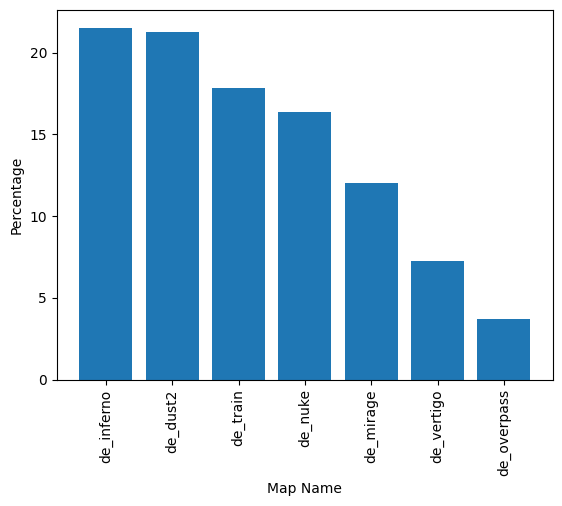

In [ ]:
plt.bar(percentage.index,percentage.values)
plt.xticks(rotation=90)
plt.xlabel('Map Name')
plt.ylabel('Percentage')
plt.show()

In [ ]:
#before making any project don't directly jump into model building ,make sure we have some analysis ,make sure there is some content the project holds

In [ ]:
#according to the plot above df_inferno mostly occuring in the dataset

In [ ]:
#preprocessing of data

According to the plot above df[inferno'] is the map mostly occuring in the dataset

**Preprocessing**:**Label Encoding**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4508 entries, 0 to 4646
Data columns (total 97 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   time_left                     4508 non-null   float64
 1   ct_score                      4508 non-null   int64  
 2   t_score                       4508 non-null   int64  
 3   map                           4508 non-null   object 
 4   bomb_planted                  4508 non-null   bool   
 5   ct_health                     4508 non-null   int64  
 6   t_health                      4508 non-null   int64  
 7   ct_armor                      4508 non-null   int64  
 8   t_armor                       4508 non-null   int64  
 9   ct_money                      4508 non-null   int64  
 10  t_money                       4508 non-null   int64  
 11  ct_helmets                    4508 non-null   int64  
 12  t_helmets                     4508 non-null   int64  
 13  ct_defus

In [ ]:
col=['bomb_planted','map','round_winner']




In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [ ]:
for i in col:
  df[i]=le.fit_transform(df[i])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4508 entries, 0 to 4646
Data columns (total 97 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   time_left                     4508 non-null   float64
 1   ct_score                      4508 non-null   int64  
 2   t_score                       4508 non-null   int64  
 3   map                           4508 non-null   int64  
 4   bomb_planted                  4508 non-null   int64  
 5   ct_health                     4508 non-null   int64  
 6   t_health                      4508 non-null   int64  
 7   ct_armor                      4508 non-null   int64  
 8   t_armor                       4508 non-null   int64  
 9   ct_money                      4508 non-null   int64  
 10  t_money                       4508 non-null   int64  
 11  ct_helmets                    4508 non-null   int64  
 12  t_helmets                     4508 non-null   int64  
 13  ct_defus

In [ ]:
df['map'].unique()

array([0, 2, 3, 1, 4, 6, 5])

In [ ]:
df['bomb_planted'].unique()

array([0, 1])

In [ ]:
df['round_winner'].unique()

array([0, 1])

In [ ]:
df['map'].value_counts()

,count
map,
1,971
0,959
5,803
3,739
2,543
6,326
4,167


**Preprocessing:Standardisation**

In [ ]:
x=df.iloc[:,:-1]    # independent features
y=df.iloc[:,-1]     #dependent features

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
sc=StandardScaler()

In [ ]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_train

array([[-0.46904683, -1.01166673,  0.28900394, ...,  0.88521452,
        -0.22036476, -0.18591145],
       [-1.2590953 ,  0.95612662,  1.62139032, ..., -0.2808434 ,
        -0.22036476, -0.18591145],
       [-0.38359029, -0.13709191,  0.51106834, ..., -0.86387236,
        -0.22036476, -0.18591145],
       ...,
       [ 1.15858885,  0.73748292,  1.39932593, ..., -0.2808434 ,
        -0.22036476, -0.18591145],
       [ 0.00237895, -1.44895415, -0.59925365, ...,  0.88521452,
        -0.22036476, -0.18591145],
       [-1.25362457, -0.35573561, -0.82131804, ..., -0.86387236,
        -0.22036476, -0.18591145]])

In [ ]:
X_test

array([[-0.37472394,  0.51883921,  0.73313274, ..., -0.2808434 ,
        -0.22036476, -0.18591145],
       [ 1.51154508,  0.73748292,  1.39932593, ..., -0.86387236,
        -0.22036476, -0.18591145],
       [ 0.37985913, -0.57437932, -0.59925365, ...,  1.46824348,
        -0.22036476, -0.18591145],
       ...,
       [ 1.51267696, -0.57437932, -1.26544684, ...,  2.05127244,
        -0.22036476, -0.18591145],
       [ 1.41326064, -1.23031044, -0.82131804, ...,  1.46824348,
        -0.22036476, -0.18591145],
       [ 1.51173373, -1.44895415, -1.26544684, ..., -0.86387236,
        -0.22036476, -0.18591145]])

In [ ]:
X_train.shape

(3606, 96)

In [ ]:
X_test.shape

(902, 96)

In [ ]:
y_train.shape

(3606,)

In [ ]:
y_test.shape

(902,)

**Applying LDA**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis(n_components=1)
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=1)

In [ ]:
ldacoef=np.exp(np.abs(lda.coef_))

In [ ]:
ldacoef =ldacoef.flatten() #we have 96 independent features and 1 target column
ldacoef.shape # is used to convert any dimensional data into 1-D

(96,)

In [ ]:
#we have 96 columns and we have to use how much better a particular column is and which column should we use

In [ ]:
#coef is used to determine the importance of a column in model building

**LDA coefficients**

**Higher the coef value the more important the feature is**

**It is used to decide the top features we can use to build the model**

In [ ]:
#we first negate the coef value then we did its exponenet to calculate the actual exponenet value

In [ ]:
df_lda_features=pd.DataFrame()
df_lda_features['Feature_name']=list(x.columns)
df_lda_features['Coef Value']=ldacoef
df_lda_features

,Feature_name,Coef Value
0,time_left,1.350434
1,ct_score,1.006223
2,t_score,1.007841
3,map,1.057164
4,bomb_planted,1.215196
...,...,...
91,t_grenade_incendiarygrenade,1.154197
92,ct_grenade_molotovgrenade,1.135282
93,t_grenade_molotovgrenade,1.116834
94,ct_grenade_decoygrenade,1.228610


In [ ]:
new_features_20=df_lda_features.nlargest(20,'Coef Value')
new_features_20

,Feature_name,Coef Value
35,t_weapon_glock,5.617319
76,ct_weapon_usps,4.837458
15,t_players_alive,4.272988
14,ct_players_alive,4.204015
8,t_armor,2.978491
73,t_weapon_deagle,2.647851
7,ct_armor,1.960859
72,ct_weapon_deagle,1.946731
65,t_weapon_sg553,1.852031
17,t_weapon_ak47,1.710781


Selected Top 40 features

In [ ]:
new_features_20.index

Index([35, 76, 15, 14, 8, 73, 7, 72, 65, 17, 40, 79, 5, 24, 90, 25, 20, 11, 89,
       78],
      dtype='int64')

In [ ]:
new_col_20=list(new_features_20.index)

In [ ]:
new_col_20

[35, 76, 15, 14, 8, 73, 7, 72, 65, 17, 40, 79, 5, 24, 90, 25, 20, 11, 89, 78]

In [ ]:
x=df.iloc[:,[35, 76, 15, 14, 8, 73, 7, 72, 65, 17, 40, 79, 5, 24, 90, 25, 20, 11, 89, 78]]
y=df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

Model Builiding

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_ml=RandomForestClassifier()
rf_ml.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred1=rf_ml.predict(X_test)

In [ ]:
y_pred1

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred1)

0.8725055432372506

**RandomForest**

**XG Boost**

In [ ]:
import xgboost                 #xgboost,adaboost are all boosting techniques that reduce overfitting of model actually. And they boost the performance
xg_m2=xgboost.XGBClassifier()

In [ ]:
xg_m2.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred2=xg_m2.predict(X_test)
y_pred2

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_m3=LogisticRegression()

In [ ]:
lg_m3.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred3=lg_m3.predict(X_test)

In [ ]:
y_pred3

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred1)

0.8725055432372506

In [ ]:
#instead of multiple algorithms we choose randomForest becuase of its higher accuracy